# Exercício Computacional 1 - Operadores Nebulosos

 - Aluno: Vítor Gabriel Reis Caitité
 - Matrícula: 2021712430

In [1]:
# Importando bibliotecas
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *

## Implementação das Funções de Pertinência

In [2]:
def trimf(x,a,b,c):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = max([min([(x[i]-a)/(b-a), (c-x[i])/(c-b)]), 0])
    return y

def gaussmf(x,c,sigma):
    return e**(-1/2 * ((x-c)/sigma)**2)

def trapmf(x,a,b,c,d):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] > a and x[i] <= b:
            y[i] = (x[i]-a)/(b-a)
        if x[i] > b and x[i] <= c:
            y[i] = 1
        if x[i] > c and x[i] < d:
            y[i] = (-x[i]+d)/(-c+d)
    return y

def gbellmf(x, a, b, c):
    return 1/(1+abs(((x-c)/a)**(2*b)))

def sigmf(x, c, a):
    return 1/(1 + e**(-a*(x-c)))
    

## 1 -  Complemento Nebuloso
Implemente os operadores de complemento nebuloso: Zadeh, Yager e Sugeno. Escolha uma função de pertinência e efetue as operações. Plote da função de pertinência e dos complementos em relação “x”. Plote os gráficos dos complementos em relação à função escolhida.

In [3]:
# Função para plotar os gráficos requisitados
def plot(x, y, fun, param):
    # Plote da função de pertinência e dos complementos em relação “x”.
    plt.figure()
    legend = [r'$y$']
    plt.plot(x, y, 'b-')
    if param == []:
        N_y = fun(y)
        plt.plot(x, N_y,'r-')
        legend.append(f'N(y)') 
    for p in param:
        N_y = fun(y, p)
        plt.plot(x, N_y,)
        legend.append(f'N(y), w={p}')
    plt.title("Função de pertinência e seu complemento em relação “x”")
    plt.grid()
    legend = plt.legend(legend)

    # Função de pertinência e complemento.
    plt.figure()
    if param == []:
        N_y = fun(y)
        plt.plot(y, N_y, 'b-')
    legend = []
    for p in param:
        N_y = fun(y, p)
        plt.plot(y, N_y)
        legend.append(f'w={p}') 
    plt.title("Complemento em relação a função escolhida")
    plt.grid()
    legend = plt.legend(legend)

### Zadeh
$N(a) = 1-a$

In [4]:
def zadeh(a):
    N_a = 1 - a
    return N_a

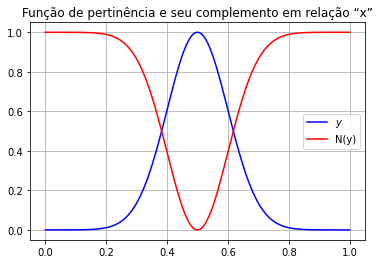

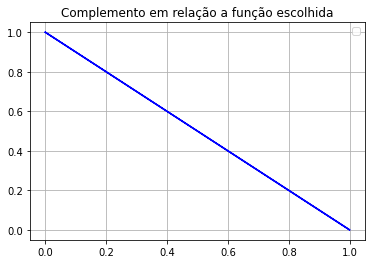

In [5]:
x = np.linspace(0, 1, 500)
y = gaussmf(x, 0.5, 0.1) 
fun = zadeh
plot(x, y, fun, [])

### Yager
$(1-a^w)^{\frac{1}{w}} \text{  tal que  } w \in (0, inf)$

In [6]:
def yager(a, w):
    N_a = None
    if w > 0:
        N_a = (1.0 - a**w)**(1.0/w)
    return N_a

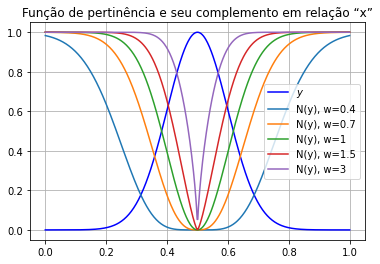

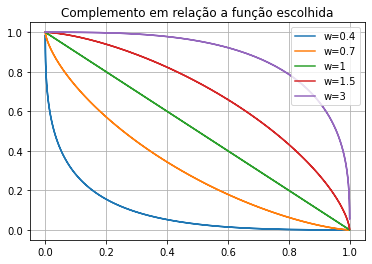

In [7]:
x = np.linspace(0, 1, 500)
y = gaussmf(x, 0.5, 0.1)
fun = yager
plot(x, y, fun, [0.4, 0.7, 1, 1.5, 3 ])

### Sugeno
${\frac{1-a}{a+sa}} \text{  tal que  } s \in (-1, inf)$

In [10]:
def sugeno(a, s):
    if s <= -1:
        return None
    N_a = (1-a)/(1+s*a)
    return N_a

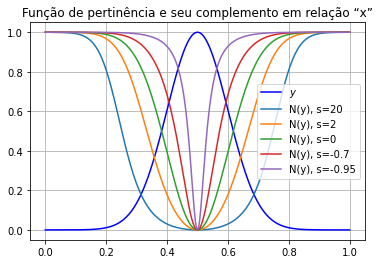

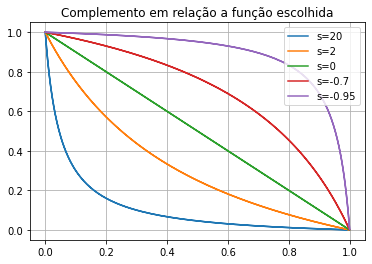

In [11]:
x = np.linspace(0, 1, 500)
y = gaussmf(x, 0.5, 0.1)
fun = sugeno
plot(x, y, fun, [20, 2, 0, -0.7, -0.95])

## 2 -  União Nebulosa
Implemente os operadores de união nebulosa: máximo, soma probabilística, soma limitada e soma drástica. Escolha duas funções de pertinência e efetue as operações. Plotar os gráficos da função e dos operadores em relação a "x”.

In [8]:
# Função para plotar gráficos
def plot2(x, y1, y2, fun):
    # Plote da funções de pertinência.
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, y1, 'b-', x, y2,'r-')
    plt.title("Funções de pertinência em relação “x”")
    plt.grid()
    legend = plt.legend([r'$y1$', r'$y2$'])
    
    # Plot da união das funções de pertinência
    plt.subplot(1, 2, 2)
    S = fun(y1, y2)
    plt.plot(x, S, 'g-')
    plt.grid()
    plt.title("União das funções de pertinência")
    legend = plt.legend([r'$fun(y1, y2)$'])
    
    # 3D:
    fig = plt.figure()
    X, Y = np.meshgrid(y1, y2)
    zs = []
    for x, y in zip(X, Y):
        zs.append(fun(x, y))
    zs = np.array(zs)
    Z = zs.reshape(X.shape)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X, Y, Z)
    ax.view_init(10, -120)
    ax.set_xlabel('y1')
    ax.set_ylabel('y2')
    ax.set_zlabel('fun(y1,y2)')

### Máximo
$S(a, b) = max(a, b)$

In [9]:
def maximum(a, b):
    S = []
    for a_i, b_i in zip(a, b):
        S.append(max(a_i, b_i))
    return np.array(S)

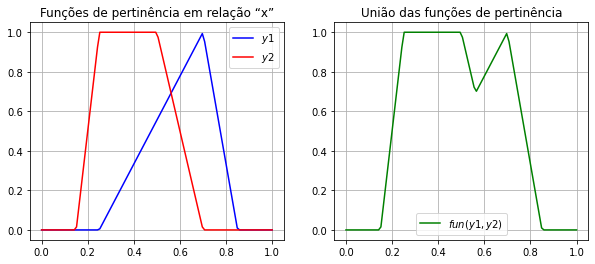

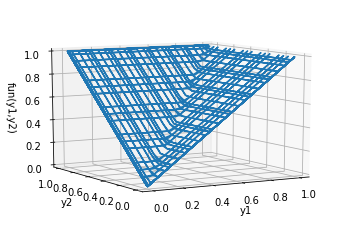

In [10]:
x = np.linspace(0, 1, 100)
y1 = trimf(x, 0.25, 0.7, 0.85)
y2 = trapmf(x, 0.15, 0.25, 0.5, 0.7)
S = maximum
plot2(x, y1, y2, S)

### Soma Probabilística
$S(a, b) = a + b - ab$

In [11]:
def probabilistic_sum(a, b):
    S = []
    for a_i, b_i in zip(a, b):
        S.append(a_i + b_i - a_i*b_i)
    return np.array(S)

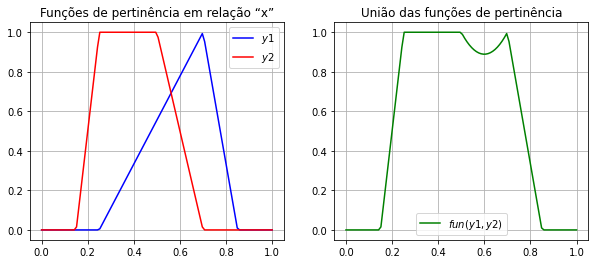

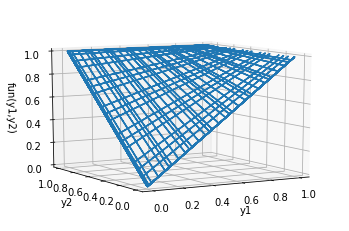

In [12]:
x = np.linspace(0, 1, 100)
y1 = trimf(x, 0.25, 0.7, 0.85)
y2 = trapmf(x, 0.15, 0.25, 0.5, 0.7)
S = probabilistic_sum
plot2(x, y1, y2, S)

### Soma Limitada
$S(a, b) = min(1, a + b)$

In [13]:
def limited_sum(a, b):
    S = []
    for a_i, b_i in zip(a, b):
        S.append(min(1, a_i + b_i))
    return np.array(S)

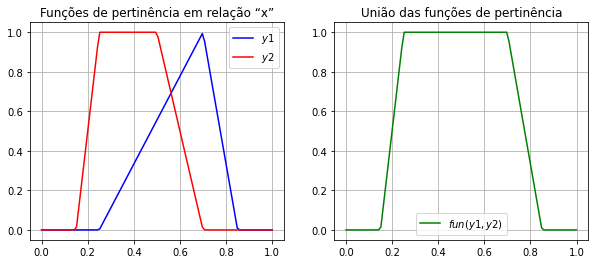

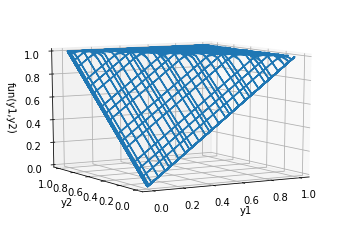

In [14]:
x = np.linspace(0, 1, 100)
y1 = trimf(x, 0.25, 0.7, 0.85)
y2 = trapmf(x, 0.15, 0.25, 0.5, 0.7)
S = limited_sum
plot2(x, y1, y2, S)

### Soma Drástica
       
       S = a, se b = 0 
           b, se a = 0 
           1, caso contrário


In [15]:
def drastic_sum(a, b):
    S = []
    for a_i, b_i in zip(a, b):
        if b_i == 0:
            S.append(a_i)
        elif a_i == 0:
            S.append(b_i)
        else:
            S.append(1)
    return np.array(S)

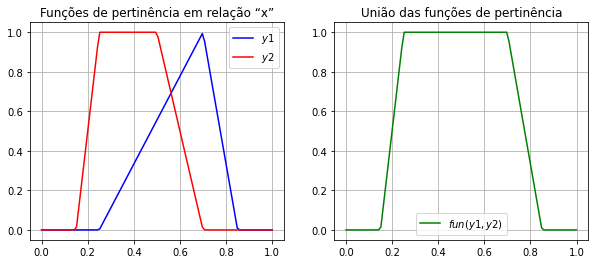

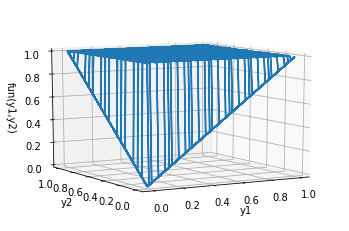

In [16]:
x = np.linspace(0, 1, 100)
y1 = trimf(x, 0.25, 0.7, 0.85)
y2 = trapmf(x, 0.15, 0.25, 0.5, 0.7)
S = drastic_sum
plot2(x, y1, y2, S)

## 3 -  Interseção Nebulosa
Implemente os interseção nebulosa: mínimo, produto algébrico, produto limitado e produto drástico. Escolha duas funções de pertinência e efetue as operações. Plotar os gráficos da função e dos operadores em relação a “x”

In [17]:
# Função para plotar os gráficos requisitados
def plot3(x, y1, y2, fun):
    # Plote das funções de pertinência:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, y1, 'b-', x, y2,'r-')
    plt.title("Funções de pertinência em relação “x”")
    plt.grid()
    legend = plt.legend([r'$y1$', r'$y2$'])
    
    # Plote da interseção das funções de pertinência:
    plt.subplot(1, 2, 2)
    T = fun(y1, y2)
    plt.plot(x, T, 'g-')
    plt.grid()
    plt.title("Interseção das funções de pertinência")
    legend = plt.legend([r'$fun(y1, y2)$'])
    
    # 3D:
    fig = plt.figure()
    X, Y = np.meshgrid(y1, y2)
    zs = []
    for x, y in zip(X, Y):
        zs.append(fun(x, y))
    zs = np.array(zs)
    Z = zs.reshape(X.shape)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X, Y, Z)
    ax.view_init(20, -120)
    ax.set_xlabel('y1')
    ax.set_ylabel('y2')
    ax.set_zlabel('fun(y1,y2)')

### Mínimo

$T(a, b) = min(a, b)$

In [18]:
def minimum(a, b):
    T = []
    for a_i, b_i in zip(a, b):
        T.append(min(a_i, b_i))
    return np.array(T)

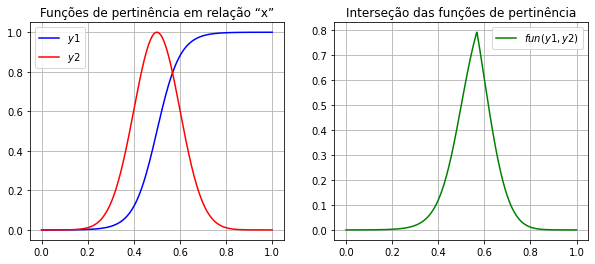

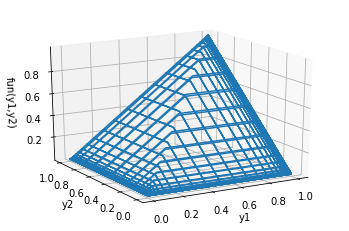

In [19]:
x = np.linspace(0, 1, 500)
y1 = sigmf(x, 0.5, 20)
y2 = gaussmf(x, 0.5, 0.1)
T = minimum
plot3(x, y1, y2, T)

### Produto

$T(a, b) = ab$

In [20]:
def product(a, b):
    T = a*b
    return T

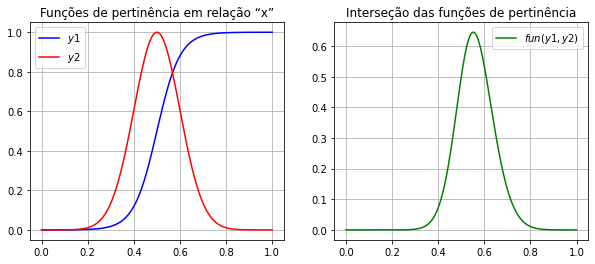

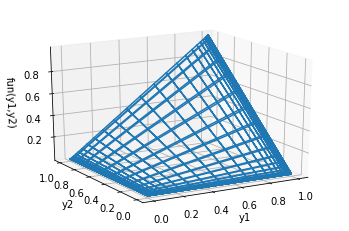

In [21]:
x = np.linspace(0, 1, 500)
y1 = sigmf(x, 0.5, 20)
y2 = gaussmf(x, 0.5, 0.1)
T = product
plot3(x, y1, y2, T)

### Produto Limitado

$T(a, b) = max(0, a + b - 1)$

In [22]:
def limited_product(a, b):
    T = []
    for a_i, b_i in zip(a, b):
        T.append(max(0, a_i + b_i - 1))
    return np.array(T)

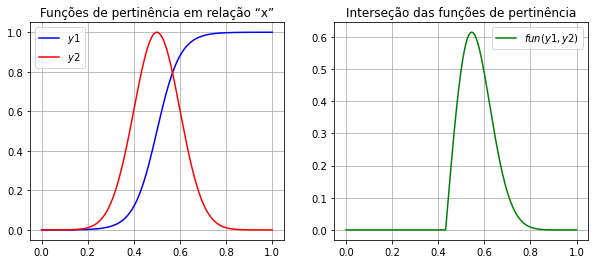

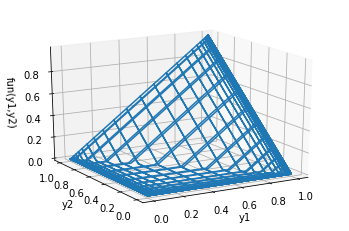

In [23]:
x = np.linspace(0, 1, 500)
y1 = sigmf(x, 0.5, 20)
y2 = gaussmf(x, 0.5, 0.1)
T = limited_product
plot3(x, y1, y2, T)

### Produto Drástico
       
       T = a, se b = 1 
           b, se a = 1 
           0, caso contrário


In [24]:
def drastic_product(a, b):
    T = []
    for a_i, b_i in zip(a, b):
        if b_i == 1:
            T.append(a_i)
        elif a_i == 1:
            T.append(b_i)
        else:
            T.append(0)
    return np.array(T)

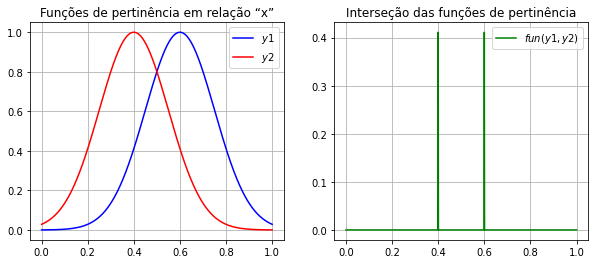

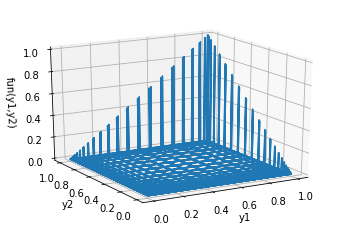

In [25]:
x = np.linspace(0, 1, 1001)
y1 = gaussmf(x, 0.6, 0.15)
y2 = gaussmf(x, 0.4, 0.15)
T = drastic_product
plot3(x, y1, y2, T)